<a href="https://colab.research.google.com/github/satanimeet/machinelearning/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path=('/content/drive/MyDrive/dataset/filter_churn.csv')
data = pd.read_csv(path)
data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_years_0-1,tenure_years_1-2,tenure_years_2-3,tenure_years_3-4,tenure_years_4-5,tenure_years_5+
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7043 non-null   int64  
 4   gender_Female                            7043 non-null   int64  
 5   gender_Male                              7043 non-null   int64  
 6   Partner_No                               7043 non-null   int64  
 7   Partner_Yes                              7043 non-null   int64  
 8   Dependents_No                            7043 non-null   int64  
 9   Dependents_Yes                           7043 non-null   int64  
 10  PhoneService_No                          7043 no

In [5]:
data.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_years_0-1,tenure_years_1-2,tenure_years_2-3,tenure_years_3-4,tenure_years_4-5,tenure_years_5+
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,64.761692,2283.300441,0.265370,0.495244,0.504756,0.516967,0.483033,0.700412,0.299588,...,0.219225,0.216101,0.335794,0.228880,0.310379,0.145393,0.118131,0.108193,0.118131,0.199773
std,0.368612,30.090047,2266.771362,0.441561,0.500013,0.500013,0.499748,0.499748,0.458110,0.458110,...,0.413751,0.411613,0.472301,0.420141,0.462682,0.352521,0.322787,0.310645,0.322787,0.399858
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.shape

(7043, 51)

In [7]:
x = data.drop('Churn', axis=1)
y = data['Churn']

In [8]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)


In [9]:
DecisionTree= DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=4, min_samples_leaf=6)
DecisionTree.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, random_state=100)

In [10]:
DecisionTree.score(test_x,test_y)
y_pred = DecisionTree.predict(test_x)


accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))

Accuracy: 0.7920511000709723
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[934 102]
 [191 182]]


In [11]:
imputer = SimpleImputer(strategy='mean')
train_x_imputed = imputer.fit_transform(train_x)
test_x_imputed = imputer.transform(test_x)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(train_x_imputed, train_y)


y_pred = ridge_model.predict(test_x_imputed)


mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

accuracy = accuracy_score(test_y, y_pred_binary)
print(f"Accuracy (after thresholding): {accuracy}")
print(classification_report(test_y, y_pred_binary))
ridgeconfu = confusion_matrix(test_y, y_pred_binary)
print(ridgeconfu)


Mean Squared Error: 0.1325829891038043
R-squared: 0.3188524403226741
Accuracy (after thresholding): 0.8097941802696949
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

[[950  86]
 [182 191]]


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

imputer = SimpleImputer(strategy='mean')
train_x_imputed = imputer.fit_transform(train_x)
test_x_imputed = imputer.transform(test_x)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(train_x_imputed, train_y)
y_pred_gb = gb_classifier.predict(test_x_imputed)

accuracy_gb = accuracy_score(test_y, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb}")

print("Classification Report:")
print(classification_report(test_y, y_pred_gb))

print("Confusion Matrix:")
cgb = confusion_matrix(test_y, y_pred_gb)
print(cgb)


Gradient Boosting Classifier Accuracy: 0.8097941802696949
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[943  93]
 [175 198]]


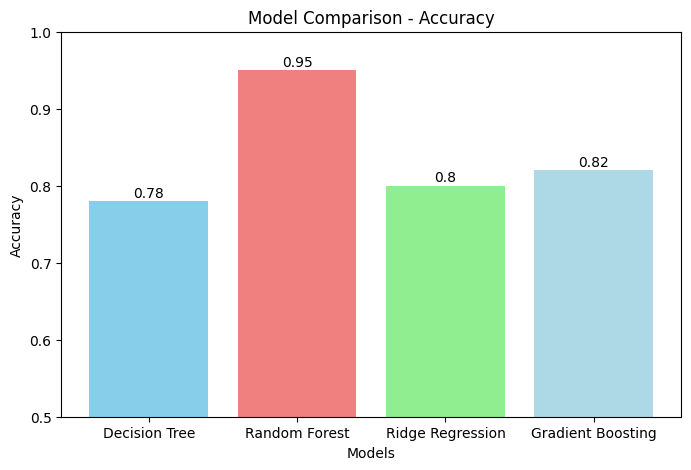

In [13]:
import matplotlib.pyplot as plt


accuracy_scores = {
    'Decision Tree': 0.78,
    'Random Forest': 0.95,
    'Ridge Regression': 0.80,
    'Gradient Boosting': 0.82
}

models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim(0.5, 1)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, str(round(v, 3)), ha='center')

plt.show()

Decision Tree Confusion Matrix:
[[934 102]
 [191 182]]


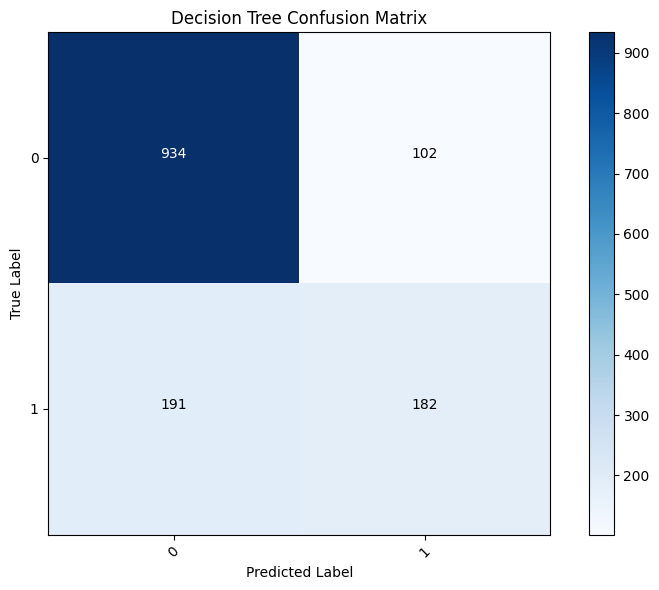

NameError: name 'random_forest' is not defined

In [18]:
def plot_confusion_matrix(cm, title):

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(test_y)))
    plt.xticks(tick_marks, np.unique(test_y), rotation=45)
    plt.yticks(tick_marks, np.unique(test_y))

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center',
                     color='white' if cm[i, j] > cm.max() / 2 else 'black')

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


cm_dt = confusion_matrix(test_y, DecisionTree.predict(test_x))
print("Decision Tree Confusion Matrix:")
print(cm_dt)
plot_confusion_matrix(cm_dt, "Decision Tree Confusion Matrix")



cm_rf = confusion_matrix(test_y, random_forest.predict(test_x))
print("\nRandom Forest Confusion Matrix:")
print(cm_rf)
plot_confusion_matrix(cm_rf, "Random Forest Confusion Matrix")




print("\nRidge Regression Confusion Matrix:")
print(ridgeconfu)
plot_confusion_matrix(ridgeconfu, "Ridge Regression Confusion Matrix")



cm_gb = confusion_matrix(test_y, y_pred_gb)
print("\nGradient Boosting Confusion Matrix:")
print(cm_gb)
plot_confusion_matrix(cm_gb, "Gradient Boosting Confusion Matrix")

In [15]:
from sklearn.tree import export_text
tree_rules = export_text(DecisionTree, feature_names=list(train_x.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Contract_Month-to-month <= 0.50
|   |--- MonthlyCharges <= 93.67
|   |   |--- Contract_One year <= 0.50
|   |   |   |--- MonthlyCharges <= 79.72
|   |   |   |   |--- class: 0
|   |   |   |--- MonthlyCharges >  79.72
|   |   |   |   |--- class: 0
|   |   |--- Contract_One year >  0.50
|   |   |   |--- StreamingMovies_Yes <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- StreamingMovies_Yes >  0.50
|   |   |   |   |--- class: 0
|   |--- MonthlyCharges >  93.67
|   |   |--- Contract_One year <= 0.50
|   |   |   |--- MonthlyCharges <= 94.30
|   |   |   |   |--- class: 0
|   |   |   |--- MonthlyCharges >  94.30
|   |   |   |   |--- class: 0
|   |   |--- Contract_One year >  0.50
|   |   |   |--- TotalCharges <= 7955.50
|   |   |   |   |--- class: 0
|   |   |   |--- TotalCharges >  7955.50
|   |   |   |   |--- class: 1
|--- Contract_Month-to-month >  0.50
|   |--- InternetService_Fiber optic <= 0.50
|   |   |--- TotalCharges <= 309.25
|   |   |   |--- OnlineSec

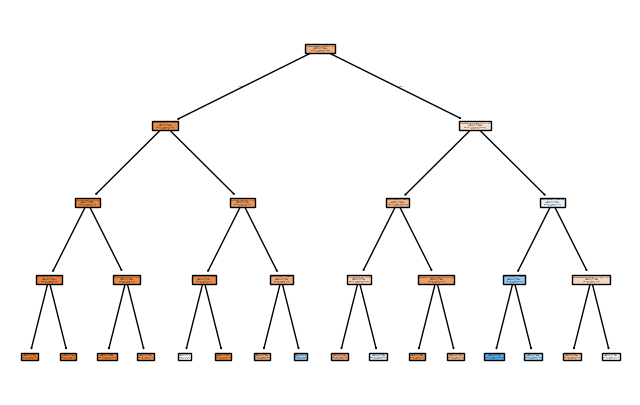

In [16]:
plt.figure(figsize=(8, 5))
plot_tree(DecisionTree, filled=True, feature_names=list(train_x.columns), class_names=['0', '1'])
plt.show()

In [27]:
y_pred=DecisionTree.predict(test_x)

[[507  34]
 [ 24 613]]


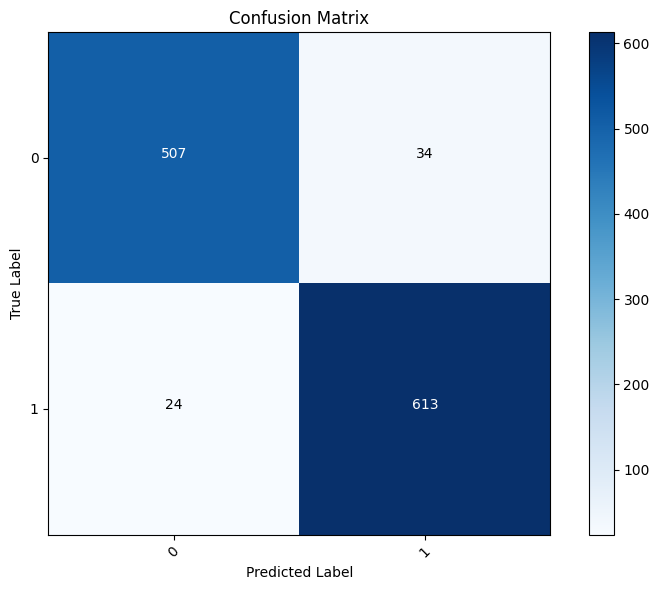

In [23]:
cm = confusion_matrix(test_y, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='white' if cm[i, j] > cm.max()/2 else 'black')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [29]:
print(classification_report(test_y, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.71      0.99      0.82       541
           1       0.99      0.65      0.78       637

    accuracy                           0.81      1178
   macro avg       0.85      0.82      0.80      1178
weighted avg       0.86      0.81      0.80      1178



In [20]:
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

x_imputed = pd.DataFrame(x_imputed, columns=x.columns)


smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(x_imputed, y)


print(pd.Series(y_resampled).value_counts())

train_x, test_x, train_y, test_y = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)




random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(train_x, train_y)
y_pred = random_forest.predict(test_x)

print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(accuracy_score(test_y, y_pred))

Churn
1    3233
0    2655
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       541
           1       0.95      0.96      0.95       637

    accuracy                           0.95      1178
   macro avg       0.95      0.95      0.95      1178
weighted avg       0.95      0.95      0.95      1178

[[507  34]
 [ 24 613]]
0.9507640067911715


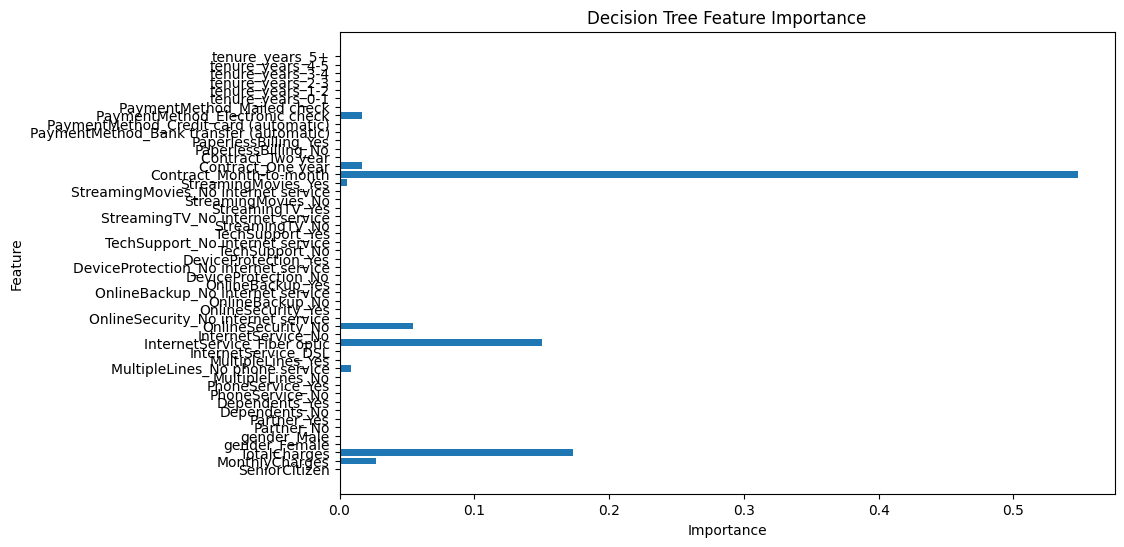

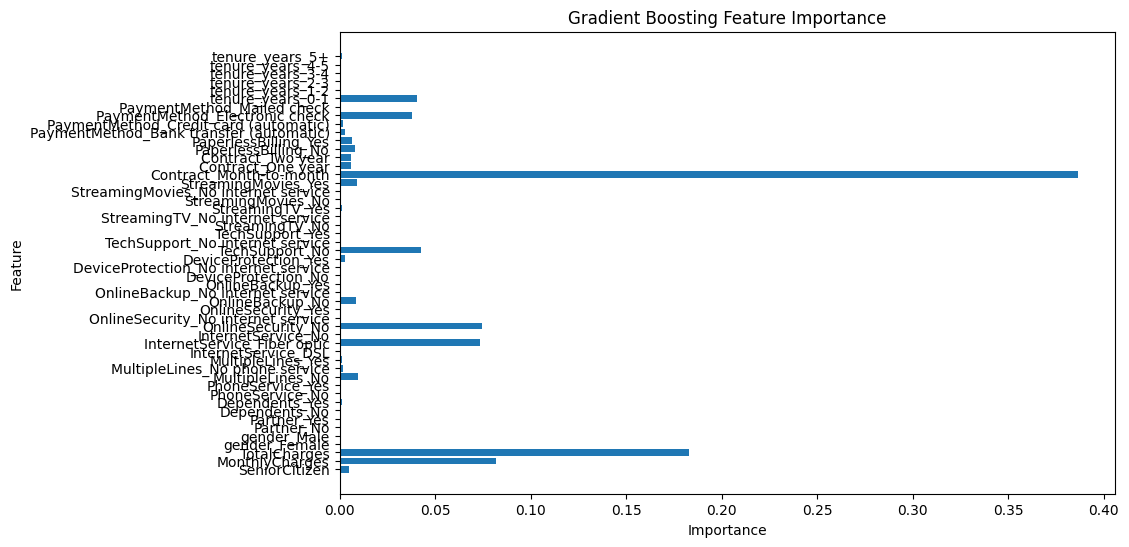

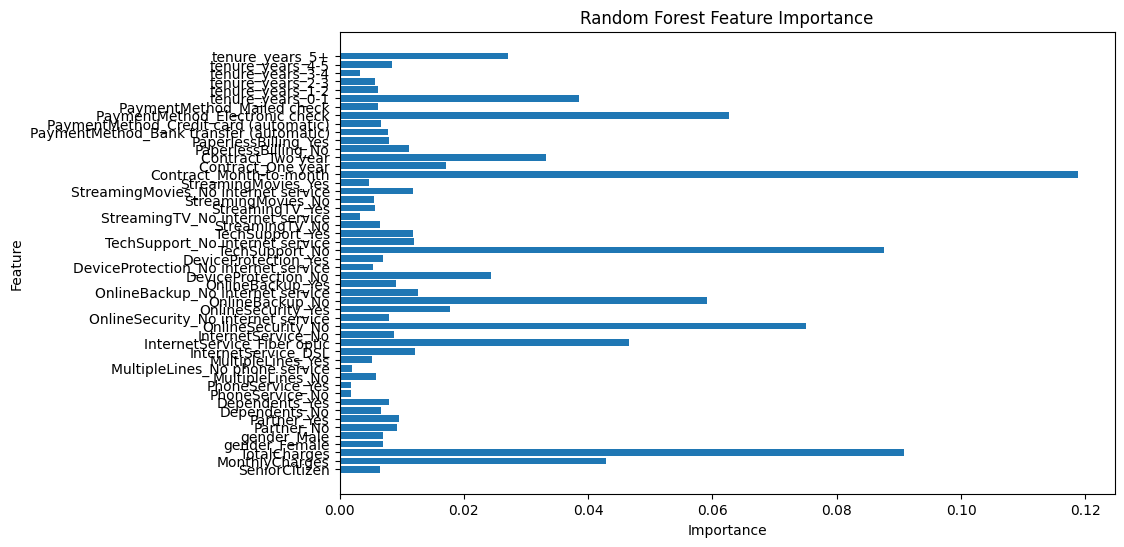

In [26]:
importances = DecisionTree.feature_importances_
feature_names = list(train_x.columns)
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()


importances_gb = gb_classifier.feature_importances_
feature_importance_gb_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_gb})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_gb_df['Feature'], feature_importance_gb_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Gradient Boosting Feature Importance")
plt.show()

importances_rf = random_forest.feature_importances_
feature_importance_rf_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf_df['Feature'], feature_importance_rf_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()